# Variational Auto Encoder

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from model import VariationalAutoencoder
from util import mnist_loader

In [3]:
mnist, size = mnist_loader()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Visualize Reconstructed images
- run `python train.py` to save model

INFO:tensorflow:Restoring parameters from ./log/vae/model.ckpt


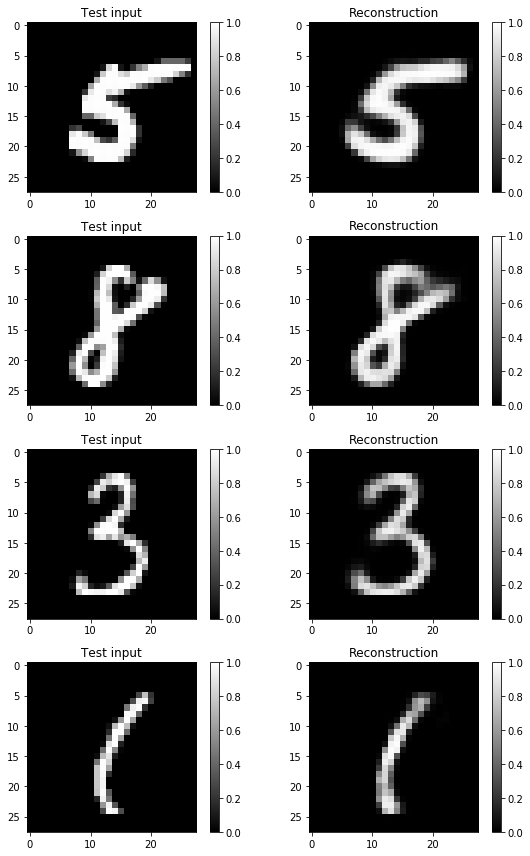

In [6]:
# load model
network_architecture = dict(n_hidden_encoder_1=500, n_hidden_encoder_2=500, n_hidden_decoder_1=500,
                            n_hidden_decoder_2=500, n_input=784, n_z=20)
model = VariationalAutoencoder(network_architecture=network_architecture, load_model="./log/vae/model.ckpt")

# feed test data and reconstruct
inputs, _ = mnist.test.next_batch(model.batch_size)
reconstruction =model.reconstruct(inputs)

# plot
plt.figure(figsize=(8, 12))
_n = 4
for i in range(_n):
    plt.subplot(_n, 2, 2*i + 1)
    plt.imshow(inputs[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(_n, 2, 2*i + 2)
    plt.imshow(reconstruction[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()

## Visualize latent space
- to see this, run VAE with 2 latent dimension

In [ ]:
# load model
network_architecture = dict(n_hidden_encoder_1=500, n_hidden_encoder_2=500, n_hidden_decoder_1=500,
                            n_hidden_decoder_2=500, n_input=784, n_z=2)
model_2d = VariationalAutoencoder(network_architecture=network_architecture, load_model="./log/vae_2d/model.ckpt")

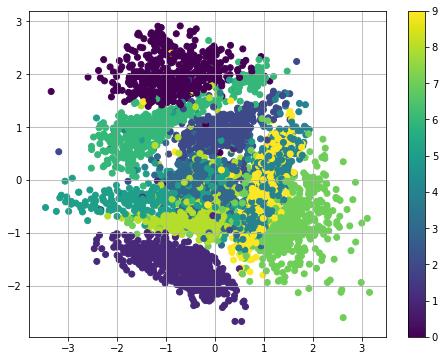

In [6]:
# generate latent vector
x_sample, y_sample = mnist.test.next_batch(5000)
z_mu = model_2d.encode(x_sample)
# plot
plt.figure(figsize=(8, 6)) 
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=np.argmax(y_sample, 1))
plt.colorbar()
plt.grid()

## Visualize decoded image by 2d latent vector

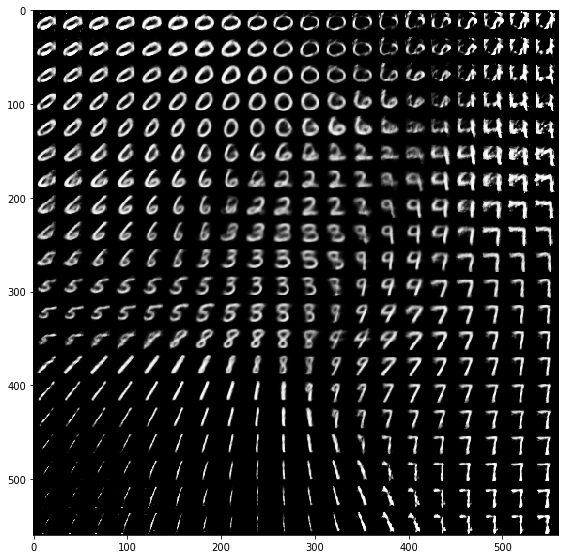

In [7]:
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]]*model_2d.batch_size)
        x_mean = model_2d.decode(z_mu)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, origin="upper", cmap="gray")
plt.tight_layout()